In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from pandas import DataFrame, Series
import numpy as np

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [4]:
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [6]:
from scikitplot.metrics import plot_roc_curve as prc
from scikitplot.metrics import plot_lift_curve as plc
from scikitplot.metrics import plot_cumulative_gain as pcg
from sklearn.metrics import classification_report

In [214]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [7]:
emp_survey = pd.read_csv("employee_survey_data.csv")
emp_gen_data = pd.read_csv("general_data.csv")
intime = pd.read_csv("in_time.csv")
outtime = pd.read_csv("out_time.csv")
manager_survey = pd.read_csv("manager_survey_data.csv")

In [8]:
print (emp_survey.shape)
print (emp_gen_data.shape)
print (intime.shape)
print (outtime.shape)
print (manager_survey.shape)

(4410, 4)
(4410, 24)
(4410, 262)
(4410, 262)
(4410, 3)


In [9]:
emp_survey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [10]:
emp_gen_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [11]:
intime.set_index('Unnamed: 0' , inplace = True)
outtime.set_index('Unnamed: 0' , inplace = True)

intime.index.rename("EmployeeID", inplace = True)
outtime.index.rename("EmployeeID", inplace = True)

In [12]:
intime.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,NaN,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,NaN,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,NaN,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,NaN,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [13]:
outtime.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,NaN,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,NaN,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,NaN,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,NaN,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [14]:
manager_survey.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [15]:
emp_survey.set_index("EmployeeID", inplace = True)
emp_gen_data.set_index("EmployeeID", inplace = True)
manager_survey.set_index("EmployeeID", inplace = True)

In [16]:
manager_survey.head()

,JobInvolvement,PerformanceRating
EmployeeID,,
1,3,3
2,2,4
3,3,3
4,2,3
5,3,3


In [17]:
print (intime.shape)
print (outtime.shape)

(4410, 261)
(4410, 261)


In [18]:
#removing null and NA columns from intime and outtime
intime.dropna( axis = 'columns', how = 'all', inplace  = True)
outtime.dropna( axis = 'columns', how = 'all', inplace = True)

In [19]:
print (intime.shape)
print (outtime.shape)

(4410, 249)
(4410, 249)


In [20]:
type(intime['2015-01-02'][1])

str

In [21]:
#converting data in intime & outtime to datetime format
for col in intime:
    intime[col] = pd.to_datetime(intime[col], format = "%Y-%m-%d %H:%M:%S")
for col in outtime:
    outtime[col] = pd.to_datetime(outtime[col], format = "%Y-%m-%d %H:%M:%S")

In [22]:
type(outtime['2015-01-02'][1])

pandas._libs.tslib.Timestamp

In [23]:
#creating new dataFramewith no of hours each emplot worked per day
diff_hours = pd.DataFrame(index = intime.index, columns = intime.columns)
diff_hours

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
for col in intime:
    diff_hours[col] = outtime[col] - intime[col]

In [25]:
diff_hours

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,07:49:52,07:20:49,07:16:03,...,NaT,NaT,07:20:21,07:23:45,06:30:17,07:35:47,07:46:26,07:18:54,07:46:44,07:04:49
2,08:06:33,07:27:17,NaT,07:23:49,07:25:00,07:09:03,07:36:41,07:16:44,07:36:47,07:43:39,...,07:55:42,07:54:11,07:45:14,07:42:44,07:26:08,NaT,07:36:53,07:58:57,07:59:10,08:13:38
3,06:41:33,07:15:56,06:24:19,06:45:54,07:20:42,06:51:41,07:25:07,06:59:59,07:26:18,07:12:37,...,07:13:06,06:47:09,07:09:49,06:48:06,06:43:49,06:50:59,07:01:26,07:26:20,07:32:20,06:47:11
4,07:20:18,07:17:31,06:56:35,06:55:10,06:51:03,07:11:35,06:59:55,07:18:23,06:52:36,06:54:28,...,07:27:21,07:37:45,06:50:48,07:19:35,07:24:49,07:05:06,07:26:50,07:25:00,07:21:59,07:07:59
5,08:03:20,07:59:17,07:40:57,07:48:22,07:39:44,07:43:18,08:21:54,08:15:26,08:15:36,08:24:13,...,08:19:12,07:54:13,07:39:54,07:57:27,07:47:13,08:14:58,07:39:44,08:16:07,07:57:12,08:01:05
6,10:46:46,10:43:19,10:57:49,10:17:55,11:00:34,11:05:59,10:50:17,10:16:12,10:39:04,10:55:19,...,10:43:54,10:33:52,11:04:02,11:08:45,10:57:39,10:28:04,NaT,10:53:37,10:53:50,10:50:18
7,06:50:18,07:32:18,07:16:00,06:25:19,07:02:23,07:09:51,06:40:59,06:54:51,07:22:41,07:27:37,...,07:16:01,07:26:58,06:37:09,NaT,06:57:37,06:54:50,06:32:22,07:03:44,07:03:11,06:52:15
8,07:05:25,07:03:13,06:39:09,06:49:34,06:19:43,06:56:44,06:42:17,06:44:07,06:45:51,06:41:07,...,07:14:10,07:03:47,07:03:33,06:38:22,06:48:32,06:37:01,06:17:00,07:15:15,06:36:23,06:39:02
9,NaT,06:59:01,07:19:05,07:33:26,07:23:13,07:20:04,06:59:59,NaT,07:34:15,06:50:35,...,07:43:53,06:35:17,07:11:50,07:18:57,07:22:33,06:46:37,NaT,07:05:51,07:06:52,07:03:59


In [26]:
diff_hours.fillna(pd.Timedelta('0'), inplace = True)

In [27]:
diff_hours

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,07:49:52,07:20:49,07:16:03,...,00:00:00,00:00:00,07:20:21,07:23:45,06:30:17,07:35:47,07:46:26,07:18:54,07:46:44,07:04:49
2,08:06:33,07:27:17,00:00:00,07:23:49,07:25:00,07:09:03,07:36:41,07:16:44,07:36:47,07:43:39,...,07:55:42,07:54:11,07:45:14,07:42:44,07:26:08,00:00:00,07:36:53,07:58:57,07:59:10,08:13:38
3,06:41:33,07:15:56,06:24:19,06:45:54,07:20:42,06:51:41,07:25:07,06:59:59,07:26:18,07:12:37,...,07:13:06,06:47:09,07:09:49,06:48:06,06:43:49,06:50:59,07:01:26,07:26:20,07:32:20,06:47:11
4,07:20:18,07:17:31,06:56:35,06:55:10,06:51:03,07:11:35,06:59:55,07:18:23,06:52:36,06:54:28,...,07:27:21,07:37:45,06:50:48,07:19:35,07:24:49,07:05:06,07:26:50,07:25:00,07:21:59,07:07:59
5,08:03:20,07:59:17,07:40:57,07:48:22,07:39:44,07:43:18,08:21:54,08:15:26,08:15:36,08:24:13,...,08:19:12,07:54:13,07:39:54,07:57:27,07:47:13,08:14:58,07:39:44,08:16:07,07:57:12,08:01:05
6,10:46:46,10:43:19,10:57:49,10:17:55,11:00:34,11:05:59,10:50:17,10:16:12,10:39:04,10:55:19,...,10:43:54,10:33:52,11:04:02,11:08:45,10:57:39,10:28:04,00:00:00,10:53:37,10:53:50,10:50:18
7,06:50:18,07:32:18,07:16:00,06:25:19,07:02:23,07:09:51,06:40:59,06:54:51,07:22:41,07:27:37,...,07:16:01,07:26:58,06:37:09,00:00:00,06:57:37,06:54:50,06:32:22,07:03:44,07:03:11,06:52:15
8,07:05:25,07:03:13,06:39:09,06:49:34,06:19:43,06:56:44,06:42:17,06:44:07,06:45:51,06:41:07,...,07:14:10,07:03:47,07:03:33,06:38:22,06:48:32,06:37:01,06:17:00,07:15:15,06:36:23,06:39:02
9,00:00:00,06:59:01,07:19:05,07:33:26,07:23:13,07:20:04,06:59:59,00:00:00,07:34:15,06:50:35,...,07:43:53,06:35:17,07:11:50,07:18:57,07:22:33,06:46:37,00:00:00,07:05:51,07:06:52,07:03:59


In [28]:
type(outtime['2015-01-06'][2])

pandas._libs.tslib.NaTType

In [29]:
diff_hours['total_hrs'] = diff_hours.sum(axis = 1)

In [30]:
diff_hours

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,total_hrs
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,07:49:52,07:20:49,07:16:03,...,00:00:00,07:20:21,07:23:45,06:30:17,07:35:47,07:46:26,07:18:54,07:46:44,07:04:49,71 days 06:41:13
2,08:06:33,07:27:17,00:00:00,07:23:49,07:25:00,07:09:03,07:36:41,07:16:44,07:36:47,07:43:39,...,07:54:11,07:45:14,07:42:44,07:26:08,00:00:00,07:36:53,07:58:57,07:59:10,08:13:38,75 days 21:40:36
3,06:41:33,07:15:56,06:24:19,06:45:54,07:20:42,06:51:41,07:25:07,06:59:59,07:26:18,07:12:37,...,06:47:09,07:09:49,06:48:06,06:43:49,06:50:59,07:01:26,07:26:20,07:32:20,06:47:11,70 days 17:12:15
4,07:20:18,07:17:31,06:56:35,06:55:10,06:51:03,07:11:35,06:59:55,07:18:23,06:52:36,06:54:28,...,07:37:45,06:50:48,07:19:35,07:24:49,07:05:06,07:26:50,07:25:00,07:21:59,07:07:59,70 days 10:30:52
5,08:03:20,07:59:17,07:40:57,07:48:22,07:39:44,07:43:18,08:21:54,08:15:26,08:15:36,08:24:13,...,07:54:13,07:39:54,07:57:27,07:47:13,08:14:58,07:39:44,08:16:07,07:57:12,08:01:05,81 days 17:30:46
6,10:46:46,10:43:19,10:57:49,10:17:55,11:00:34,11:05:59,10:50:17,10:16:12,10:39:04,10:55:19,...,10:33:52,11:04:02,11:08:45,10:57:39,10:28:04,00:00:00,10:53:37,10:53:50,10:50:18,106 days 14:40:29
7,06:50:18,07:32:18,07:16:00,06:25:19,07:02:23,07:09:51,06:40:59,06:54:51,07:22:41,07:27:37,...,07:26:58,06:37:09,00:00:00,06:57:37,06:54:50,06:32:22,07:03:44,07:03:11,06:52:15,66 days 22:16:06
8,07:05:25,07:03:13,06:39:09,06:49:34,06:19:43,06:56:44,06:42:17,06:44:07,06:45:51,06:41:07,...,07:03:47,07:03:33,06:38:22,06:48:32,06:37:01,06:17:00,07:15:15,06:36:23,06:39:02,68 days 02:19:33
9,00:00:00,06:59:01,07:19:05,07:33:26,07:23:13,07:20:04,06:59:59,00:00:00,07:34:15,06:50:35,...,06:35:17,07:11:50,07:18:57,07:22:33,06:46:37,00:00:00,07:05:51,07:06:52,07:03:59,69 days 08:23:41


In [31]:
diff_hours['total days'] = ""

In [32]:
for i in range (1,diff_hours.shape[0]+1):
    diff_hours['total days'][i] = diff_hours['total_hrs'][i].days

/Users/gp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
diff_hours

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,total_hrs,total days
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,07:49:52,07:20:49,07:16:03,...,07:20:21,07:23:45,06:30:17,07:35:47,07:46:26,07:18:54,07:46:44,07:04:49,71 days 06:41:13,71
2,08:06:33,07:27:17,00:00:00,07:23:49,07:25:00,07:09:03,07:36:41,07:16:44,07:36:47,07:43:39,...,07:45:14,07:42:44,07:26:08,00:00:00,07:36:53,07:58:57,07:59:10,08:13:38,75 days 21:40:36,75
3,06:41:33,07:15:56,06:24:19,06:45:54,07:20:42,06:51:41,07:25:07,06:59:59,07:26:18,07:12:37,...,07:09:49,06:48:06,06:43:49,06:50:59,07:01:26,07:26:20,07:32:20,06:47:11,70 days 17:12:15,70
4,07:20:18,07:17:31,06:56:35,06:55:10,06:51:03,07:11:35,06:59:55,07:18:23,06:52:36,06:54:28,...,06:50:48,07:19:35,07:24:49,07:05:06,07:26:50,07:25:00,07:21:59,07:07:59,70 days 10:30:52,70
5,08:03:20,07:59:17,07:40:57,07:48:22,07:39:44,07:43:18,08:21:54,08:15:26,08:15:36,08:24:13,...,07:39:54,07:57:27,07:47:13,08:14:58,07:39:44,08:16:07,07:57:12,08:01:05,81 days 17:30:46,81
6,10:46:46,10:43:19,10:57:49,10:17:55,11:00:34,11:05:59,10:50:17,10:16:12,10:39:04,10:55:19,...,11:04:02,11:08:45,10:57:39,10:28:04,00:00:00,10:53:37,10:53:50,10:50:18,106 days 14:40:29,106
7,06:50:18,07:32:18,07:16:00,06:25:19,07:02:23,07:09:51,06:40:59,06:54:51,07:22:41,07:27:37,...,06:37:09,00:00:00,06:57:37,06:54:50,06:32:22,07:03:44,07:03:11,06:52:15,66 days 22:16:06,66
8,07:05:25,07:03:13,06:39:09,06:49:34,06:19:43,06:56:44,06:42:17,06:44:07,06:45:51,06:41:07,...,07:03:33,06:38:22,06:48:32,06:37:01,06:17:00,07:15:15,06:36:23,06:39:02,68 days 02:19:33,68
9,00:00:00,06:59:01,07:19:05,07:33:26,07:23:13,07:20:04,06:59:59,00:00:00,07:34:15,06:50:35,...,07:11:50,07:18:57,07:22:33,06:46:37,00:00:00,07:05:51,07:06:52,07:03:59,69 days 08:23:41,69


In [34]:
type(diff_hours['total_hrs'][1])

pandas._libs.tslib.Timedelta

In [35]:
type(diff_hours['total days'][1])

int

In [36]:
(diff_hours['total_hrs'][2].seconds)//3600

21

In [37]:
diff_hours['total'] = ""
for i in range (1,diff_hours.shape[0] + 1):
    diff_hours['total'][i] = diff_hours['total days'][i] * 24 + (diff_hours['total_hrs'][i].seconds)//3600

/Users/gp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
diff_hours

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,total_hrs,total days,total
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,07:49:52,07:20:49,07:16:03,...,07:23:45,06:30:17,07:35:47,07:46:26,07:18:54,07:46:44,07:04:49,71 days 06:41:13,71,1710
2,08:06:33,07:27:17,00:00:00,07:23:49,07:25:00,07:09:03,07:36:41,07:16:44,07:36:47,07:43:39,...,07:42:44,07:26:08,00:00:00,07:36:53,07:58:57,07:59:10,08:13:38,75 days 21:40:36,75,1821
3,06:41:33,07:15:56,06:24:19,06:45:54,07:20:42,06:51:41,07:25:07,06:59:59,07:26:18,07:12:37,...,06:48:06,06:43:49,06:50:59,07:01:26,07:26:20,07:32:20,06:47:11,70 days 17:12:15,70,1697
4,07:20:18,07:17:31,06:56:35,06:55:10,06:51:03,07:11:35,06:59:55,07:18:23,06:52:36,06:54:28,...,07:19:35,07:24:49,07:05:06,07:26:50,07:25:00,07:21:59,07:07:59,70 days 10:30:52,70,1690
5,08:03:20,07:59:17,07:40:57,07:48:22,07:39:44,07:43:18,08:21:54,08:15:26,08:15:36,08:24:13,...,07:57:27,07:47:13,08:14:58,07:39:44,08:16:07,07:57:12,08:01:05,81 days 17:30:46,81,1961
6,10:46:46,10:43:19,10:57:49,10:17:55,11:00:34,11:05:59,10:50:17,10:16:12,10:39:04,10:55:19,...,11:08:45,10:57:39,10:28:04,00:00:00,10:53:37,10:53:50,10:50:18,106 days 14:40:29,106,2558
7,06:50:18,07:32:18,07:16:00,06:25:19,07:02:23,07:09:51,06:40:59,06:54:51,07:22:41,07:27:37,...,00:00:00,06:57:37,06:54:50,06:32:22,07:03:44,07:03:11,06:52:15,66 days 22:16:06,66,1606
8,07:05:25,07:03:13,06:39:09,06:49:34,06:19:43,06:56:44,06:42:17,06:44:07,06:45:51,06:41:07,...,06:38:22,06:48:32,06:37:01,06:17:00,07:15:15,06:36:23,06:39:02,68 days 02:19:33,68,1634
9,00:00:00,06:59:01,07:19:05,07:33:26,07:23:13,07:20:04,06:59:59,00:00:00,07:34:15,06:50:35,...,07:18:57,07:22:33,06:46:37,00:00:00,07:05:51,07:06:52,07:03:59,69 days 08:23:41,69,1664


In [39]:
"""the company standard (2) is 6-9 hrs per day, anything below 6 hrs is considered as under-worked (1) 
and above 9 hrs is over-worked (3)"""
#total working days = 249
print (6*249)
print(9*249)

1494
2241


In [40]:
diff_hours["time_slab"] = ""
for i in range (1, diff_hours.shape[0]+1):
    if diff_hours['total'][i]< 1494 :
        diff_hours["time_slab"][i] = 1
    elif diff_hours['total'][i] > 2241 :
        diff_hours["time_slab"][i] = 3
    else :
        diff_hours["time_slab"][i] = 2

/Users/gp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/gp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/gp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [41]:
diff_hours

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,total_hrs,total days,total,time_slab
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,07:12:30,07:11:23,07:24:39,07:00:24,07:17:23,07:29:04,07:15:46,07:49:52,07:20:49,07:16:03,...,06:30:17,07:35:47,07:46:26,07:18:54,07:46:44,07:04:49,71 days 06:41:13,71,1710,2
2,08:06:33,07:27:17,00:00:00,07:23:49,07:25:00,07:09:03,07:36:41,07:16:44,07:36:47,07:43:39,...,07:26:08,00:00:00,07:36:53,07:58:57,07:59:10,08:13:38,75 days 21:40:36,75,1821,2
3,06:41:33,07:15:56,06:24:19,06:45:54,07:20:42,06:51:41,07:25:07,06:59:59,07:26:18,07:12:37,...,06:43:49,06:50:59,07:01:26,07:26:20,07:32:20,06:47:11,70 days 17:12:15,70,1697,2
4,07:20:18,07:17:31,06:56:35,06:55:10,06:51:03,07:11:35,06:59:55,07:18:23,06:52:36,06:54:28,...,07:24:49,07:05:06,07:26:50,07:25:00,07:21:59,07:07:59,70 days 10:30:52,70,1690,2
5,08:03:20,07:59:17,07:40:57,07:48:22,07:39:44,07:43:18,08:21:54,08:15:26,08:15:36,08:24:13,...,07:47:13,08:14:58,07:39:44,08:16:07,07:57:12,08:01:05,81 days 17:30:46,81,1961,2
6,10:46:46,10:43:19,10:57:49,10:17:55,11:00:34,11:05:59,10:50:17,10:16:12,10:39:04,10:55:19,...,10:57:39,10:28:04,00:00:00,10:53:37,10:53:50,10:50:18,106 days 14:40:29,106,2558,3
7,06:50:18,07:32:18,07:16:00,06:25:19,07:02:23,07:09:51,06:40:59,06:54:51,07:22:41,07:27:37,...,06:57:37,06:54:50,06:32:22,07:03:44,07:03:11,06:52:15,66 days 22:16:06,66,1606,2
8,07:05:25,07:03:13,06:39:09,06:49:34,06:19:43,06:56:44,06:42:17,06:44:07,06:45:51,06:41:07,...,06:48:32,06:37:01,06:17:00,07:15:15,06:36:23,06:39:02,68 days 02:19:33,68,1634,2
9,00:00:00,06:59:01,07:19:05,07:33:26,07:23:13,07:20:04,06:59:59,00:00:00,07:34:15,06:50:35,...,07:22:33,06:46:37,00:00:00,07:05:51,07:06:52,07:03:59,69 days 08:23:41,69,1664,2


In [42]:
diff_hours["time_slab"].value_counts()

2    3066
1     682
3     662
Name: time_slab, dtype: int64

<Container object of 3 artists>

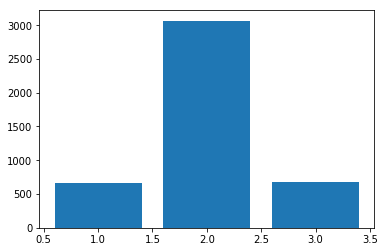

In [43]:
plt.bar(diff_hours["time_slab"].unique(), diff_hours["time_slab"].value_counts())

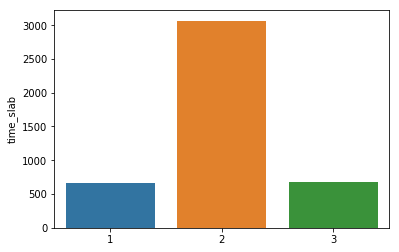

In [44]:
sns.barplot(x=diff_hours["time_slab"].unique(), y=diff_hours["time_slab"].value_counts())

In [45]:
print (emp_survey.shape)
print (emp_gen_data.shape)
print (manager_survey.shape)

(4410, 3)
(4410, 23)
(4410, 2)


In [46]:
data = emp_gen_data.join(emp_survey)

In [47]:
data = data.join(manager_survey)

In [48]:
data = data.join(diff_hours['total'])

In [49]:
data = data.join(diff_hours['time_slab'])

In [50]:
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,total,time_slab
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1,0,0,3.0,4.0,2.0,3,3,1710,2
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,5,1,4,3.0,2.0,4.0,2,4,1821,2
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,5,0,3,2.0,2.0,1.0,3,3,1697,2
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,8,7,5,4.0,4.0,3.0,2,3,1690,2
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,6,0,4,4.0,1.0,3.0,3,3,1961,2
6,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,Female,4,...,7,7,7,3.0,2.0,2.0,3,3,2558,3
7,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,Male,2,...,0,0,0,1.0,3.0,1.0,3,4,1606,2
8,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,Male,2,...,0,0,0,1.0,2.0,3.0,3,4,1634,2
9,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,Male,3,...,9,7,8,2.0,4.0,3.0,3,4,1664,2


In [51]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'total', 'time_slab'],
      dtype='object')

# Exploratory Data Analysis

## barcharts for categorical features

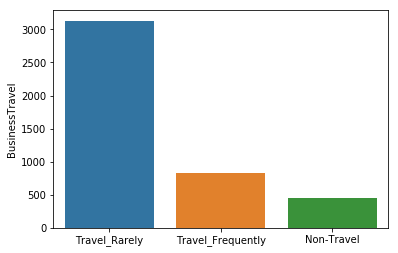

In [57]:
sns.barplot(x=data["BusinessTravel"].unique(), y=data["BusinessTravel"].value_counts())

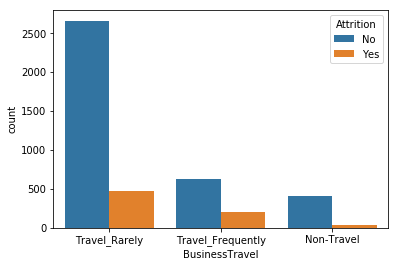

In [58]:
sns.countplot(x = "BusinessTravel", data = data, hue = data['Attrition'])

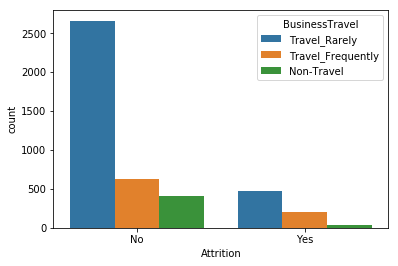

In [59]:
sns.countplot(hue = "BusinessTravel", data = data, x = data['Attrition'])

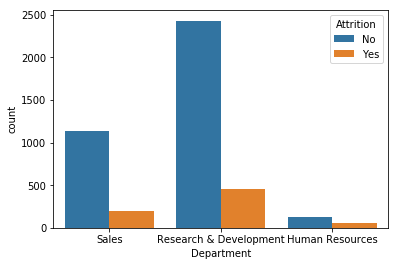

In [60]:
sns.countplot(x = "Department", data = data, hue = data['Attrition'])

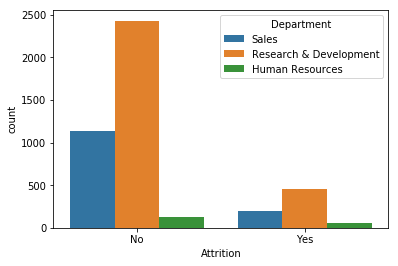

In [61]:
sns.countplot(hue = "Department", data = data, x = data['Attrition'])

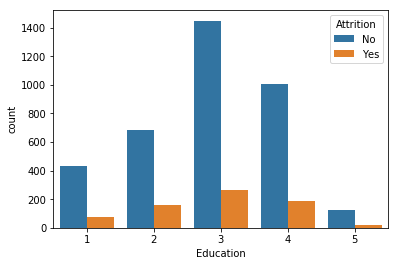

In [62]:
sns.countplot(x = "Education", data = data, hue = data['Attrition'])

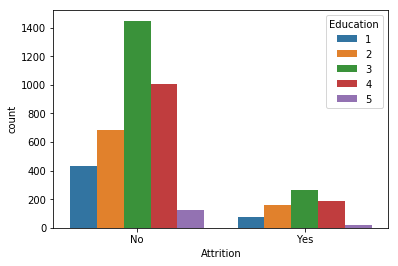

In [63]:
sns.countplot(hue = "Education", data = data, x = data['Attrition'])

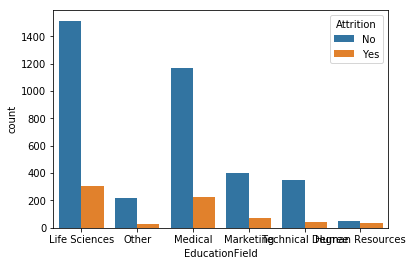

In [64]:
sns.countplot(x = "EducationField", data = data, hue = data['Attrition'])

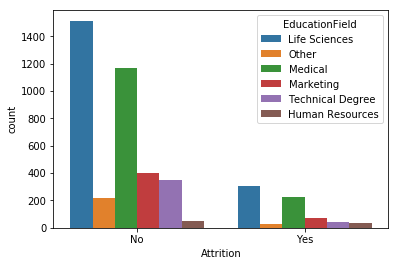

In [65]:
sns.countplot(hue = "EducationField", data = data, x = data['Attrition'])

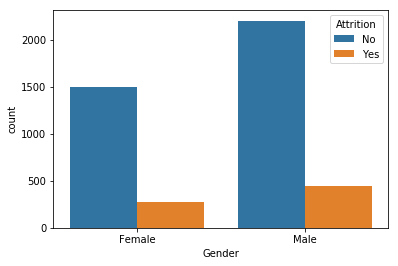

In [66]:
sns.countplot(x = "Gender", data = data, hue = data['Attrition'])

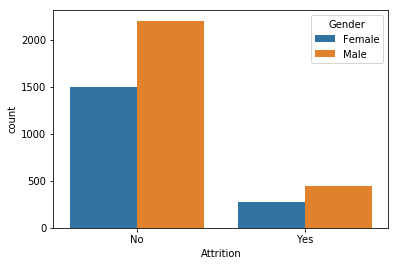

In [67]:
sns.countplot(hue = "Gender", data = data, x = data['Attrition'])

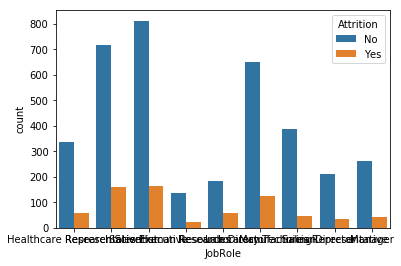

In [68]:
sns.countplot(x = "JobRole", data = data, hue = data['Attrition'])

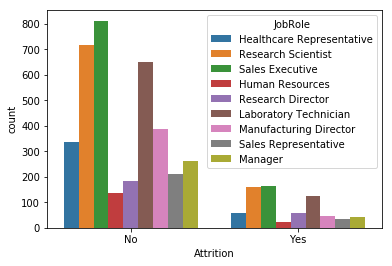

In [69]:
sns.countplot(hue = "JobRole", data = data, x = data['Attrition'])

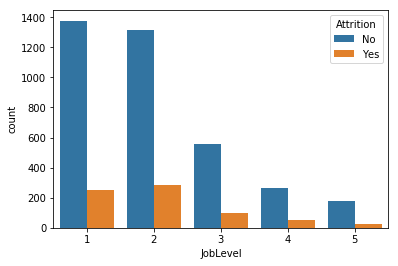

In [70]:
sns.countplot(x = "JobLevel", data = data, hue = data['Attrition'])

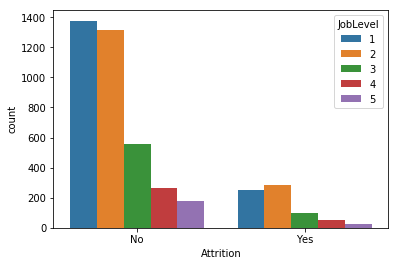

In [71]:
sns.countplot(hue = "JobLevel", data = data, x = data['Attrition'])

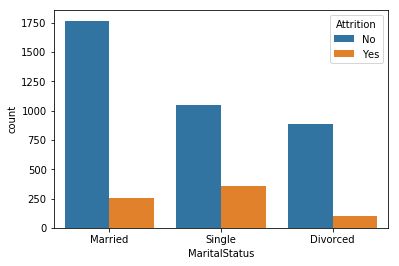

In [72]:
sns.countplot(x = "MaritalStatus", data = data, hue = data['Attrition'])

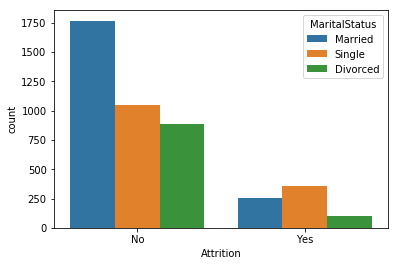

In [73]:
sns.countplot(hue = "MaritalStatus", data = data, x = data['Attrition'])

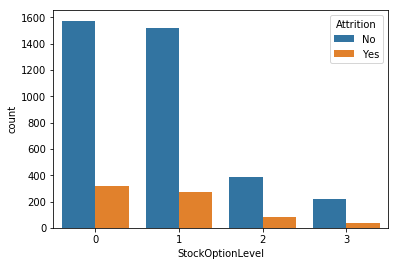

In [74]:
sns.countplot(x = "StockOptionLevel", data = data, hue = data['Attrition'])

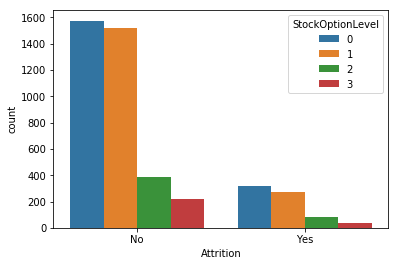

In [75]:
sns.countplot(hue = "StockOptionLevel", data = data, x = data['Attrition'])

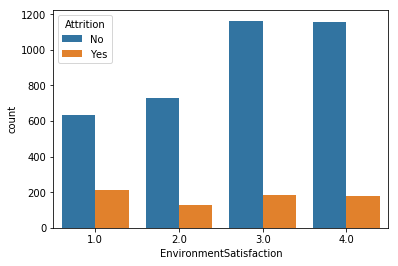

In [76]:
sns.countplot(x = "EnvironmentSatisfaction", data = data, hue = data['Attrition'])

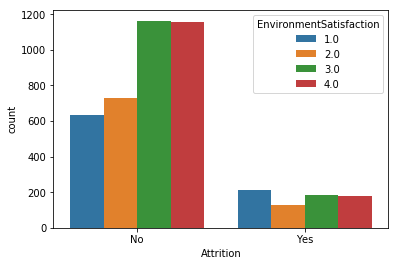

In [77]:
sns.countplot(hue = "EnvironmentSatisfaction", data = data, x = data['Attrition'])

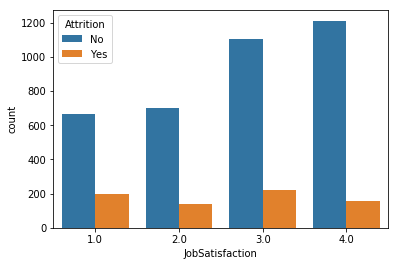

In [78]:
sns.countplot(x = "JobSatisfaction", data = data, hue = data['Attrition'])

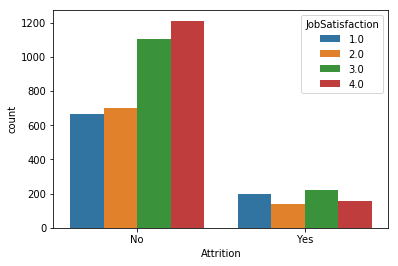

In [79]:
sns.countplot(hue = "JobSatisfaction", data = data, x = data['Attrition'])

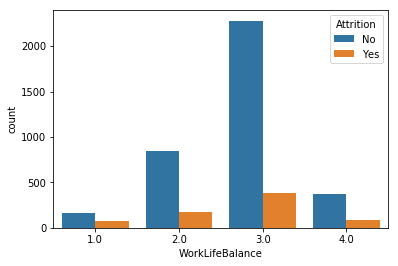

In [80]:
sns.countplot(x = "WorkLifeBalance", data = data, hue = data['Attrition'])

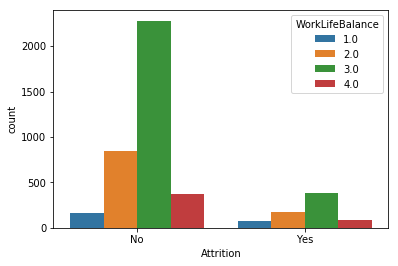

In [81]:
sns.countplot(hue = "WorkLifeBalance", data = data, x = data['Attrition'])

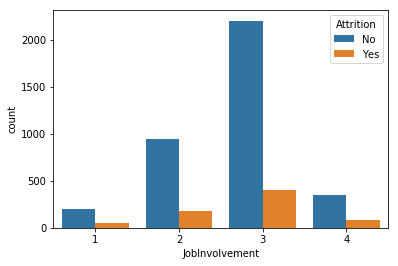

In [82]:
sns.countplot(x = "JobInvolvement", data = data, hue = data['Attrition'])

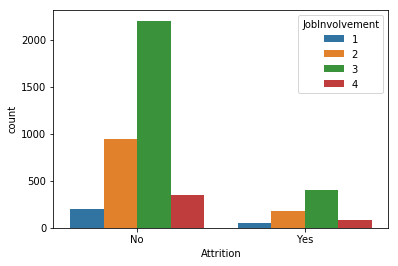

In [83]:
sns.countplot(hue = "JobInvolvement", data = data, x = data['Attrition'])

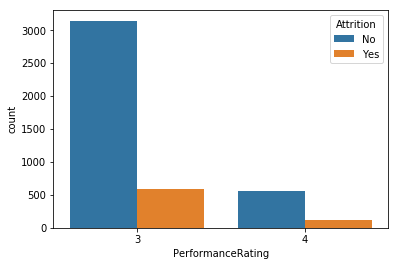

In [84]:
sns.countplot(x = "PerformanceRating", data = data, hue = data['Attrition'])

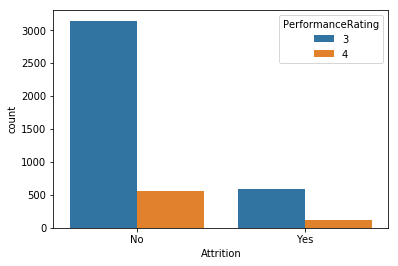

In [85]:
sns.countplot(hue = "PerformanceRating", data = data, x = data['Attrition'])

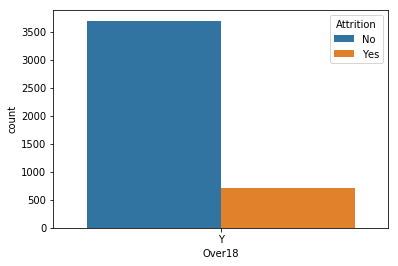

In [86]:
sns.countplot(x = "Over18", data = data, hue = data['Attrition'])

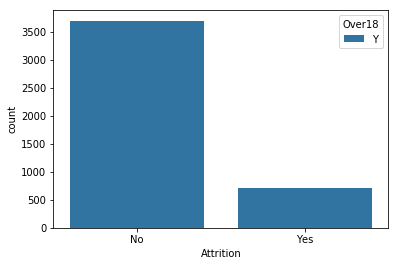

In [87]:
sns.countplot(hue = "Over18", data = data, x = data['Attrition'])

## barcharts for numeric variables

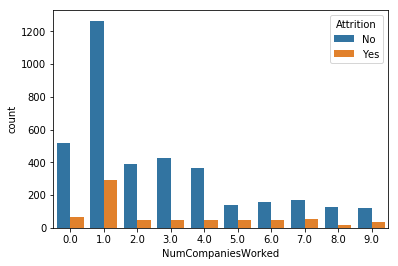

In [88]:
sns.countplot(x = "NumCompaniesWorked", data = data, hue = data['Attrition'])

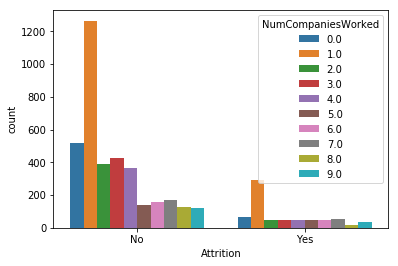

In [89]:
sns.countplot(hue = "NumCompaniesWorked", data = data, x = data['Attrition'])

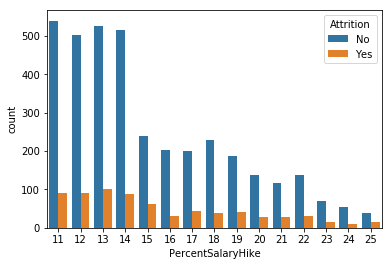

In [90]:
sns.countplot(x = "PercentSalaryHike", data = data, hue = data['Attrition'])

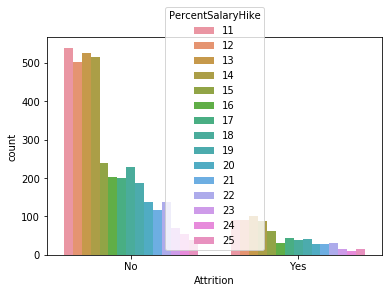

In [91]:
sns.countplot(hue = "PercentSalaryHike", data = data, x = data['Attrition'])

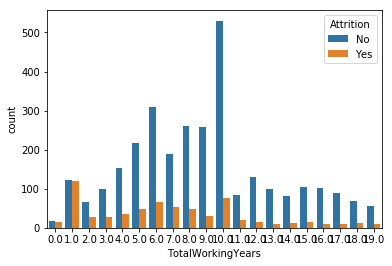

In [92]:
sns.countplot(x = "TotalWorkingYears", data = data[data["TotalWorkingYears"]< 20], hue = data['Attrition'])

## Boxplots for numeric variables 

/Users/gp/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


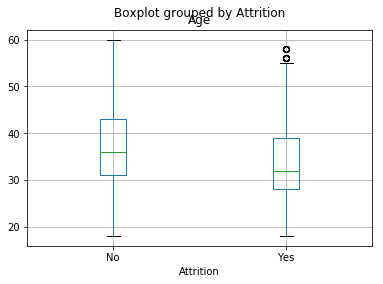

In [247]:
data.boxplot('Age', by = 'Attrition')

Employees aged 36 years and above are more likely to stay. 
Employees aged 32 years and below are more likely to leave.

/Users/gp/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


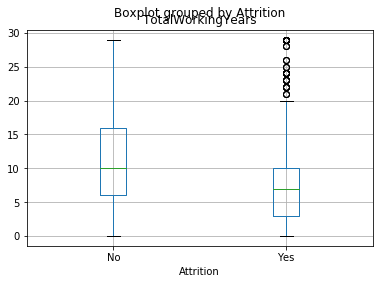

In [250]:
data.boxplot('TotalWorkingYears', by = 'Attrition')

Employees that have worked for a total of 10 years or more are more likely to stay. Employees that have worked for a total of 7 years or less are more likely to leave.

/Users/gp/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


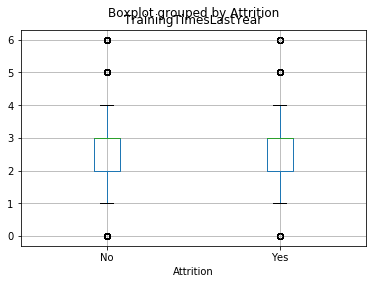

In [252]:
data.boxplot('TrainingTimesLastYear', by = 'Attrition')

/Users/gp/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


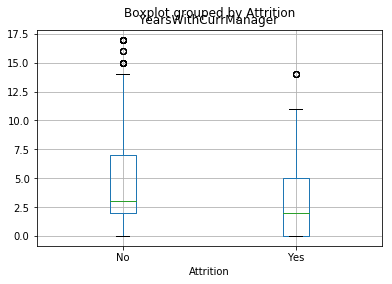

In [256]:
data.boxplot('YearsWithCurrManager', by = 'Attrition')

Employees that have spent 3 years or more under the same manager are more likely to stay. 
Employees that have spent 2 years or less under the same manager are more likely to leave. 

/Users/gp/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


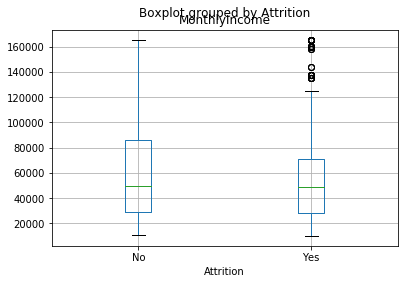

In [258]:
data.boxplot('MonthlyIncome', by = 'Attrition')

/Users/gp/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


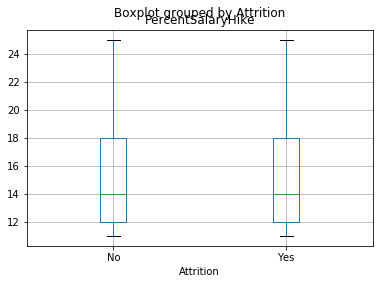

In [259]:
data.boxplot('PercentSalaryHike', by = 'Attrition')

## Histogram and kdeplots for numeric variables 

In [52]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


(array([ 171.,  315.,  672.,  795.,  765.,  651.,  393.,  276.,  231.,  141.]),
 array([ 18. ,  22.2,  26.4,  30.6,  34.8,  39. ,  43.2,  47.4,  51.6,
         55.8,  60. ]),
 <a list of 10 Patch objects>)

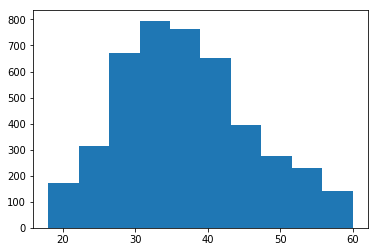

In [53]:
plt.hist(data['Age'])

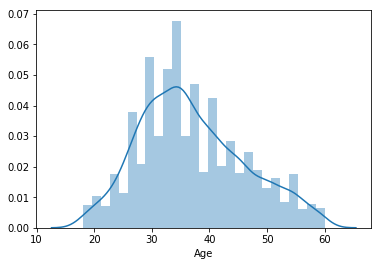

In [54]:
sns.distplot(data['Age'])

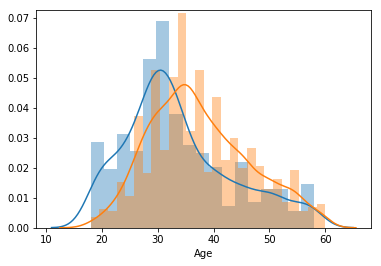

In [194]:
sns.distplot(data[data['Attrition']=='Yes']['Age'])
sns.distplot(data[data['Attrition']=='No']['Age'])

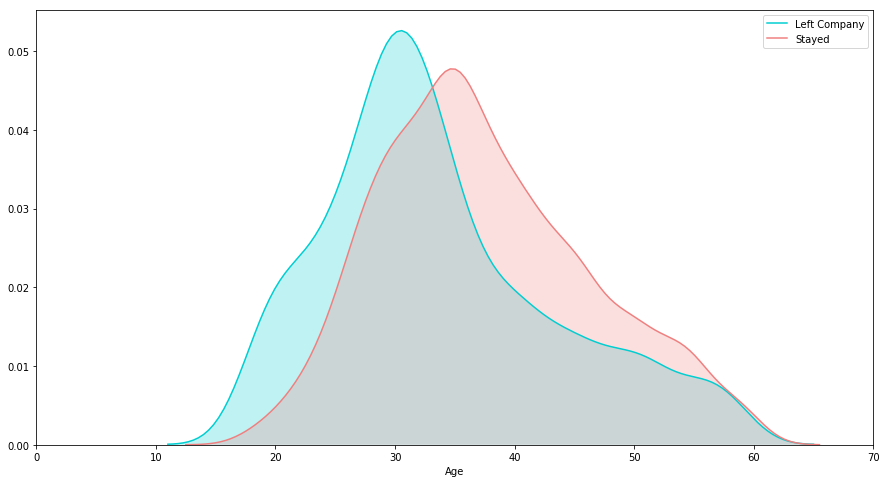

In [198]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data[data['Attrition']=='Yes']['Age'], color="darkturquoise", shade=True)
sns.kdeplot(data[data['Attrition']=='No']['Age'], color="lightcoral", shade=True)
plt.legend(['Left Company', 'Stayed'])
ax.set(xlabel='Age')
plt.xlim(0,70)
plt.show()
#Younger people have a higher tendency of leaving the company

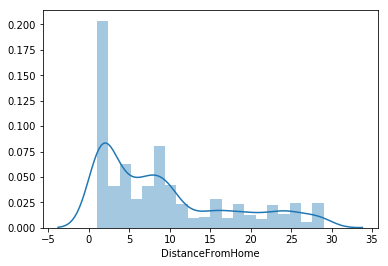

In [55]:
sns.distplot(data['DistanceFromHome'])

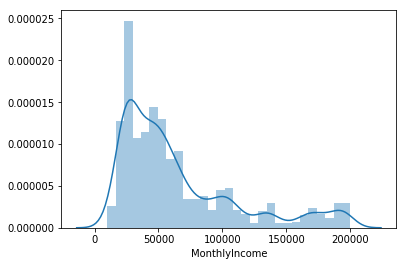

In [56]:
sns.distplot(data['MonthlyIncome'])

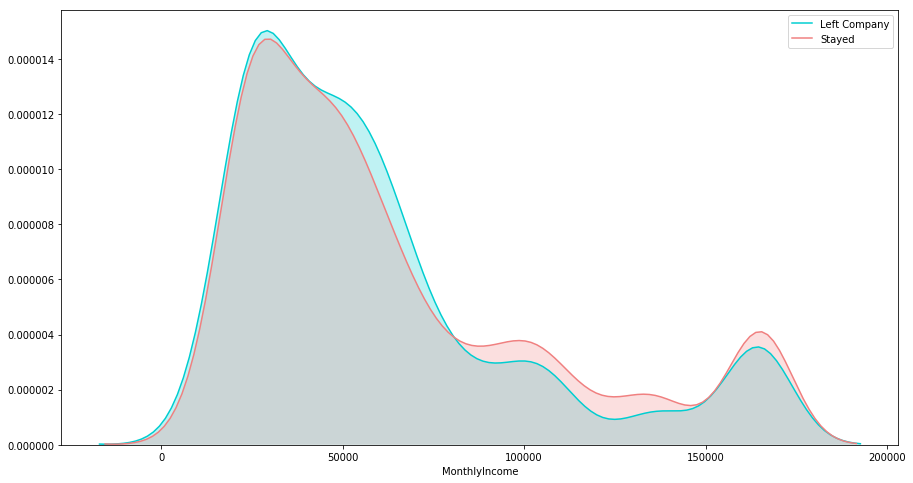

In [199]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data[data['Attrition']=='Yes']['MonthlyIncome'], color="darkturquoise", shade=True)
sns.kdeplot(data[data['Attrition']=='No']['MonthlyIncome'], color="lightcoral", shade=True)
plt.legend(['Left Company', 'Stayed'])
ax.set(xlabel='MonthlyIncome')
plt.show()

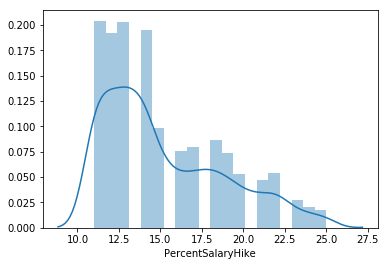

In [57]:
sns.distplot(data['PercentSalaryHike'])

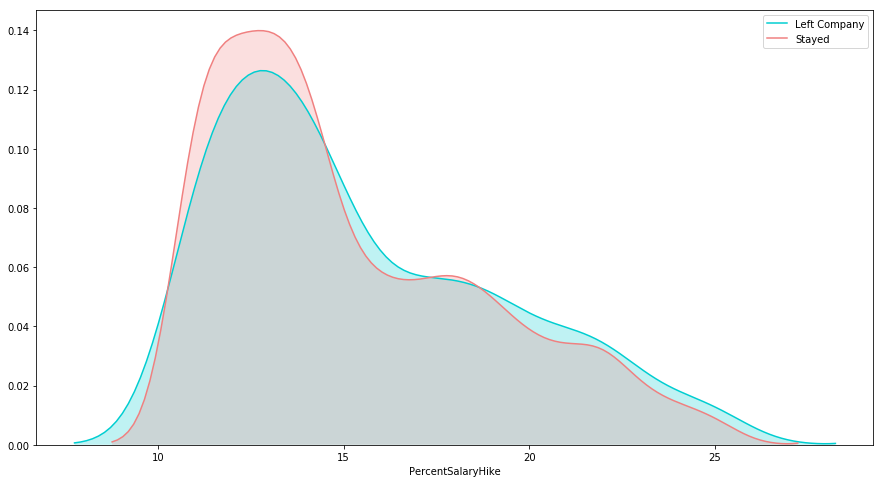

In [201]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data[data['Attrition']=='Yes']['PercentSalaryHike'], color="darkturquoise", shade=True)
sns.kdeplot(data[data['Attrition']=='No']['PercentSalaryHike'], color="lightcoral", shade=True)
plt.legend(['Left Company', 'Stayed'])
ax.set(xlabel='PercentSalaryHike')
plt.show()

# Data preparation

## missing values

In [58]:
data.shape

(4410, 30)

In [59]:
data.dropna( axis = 'rows')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,total,time_slab
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1,0,0,3.0,4.0,2.0,3,3,1710,2
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,5,1,4,3.0,2.0,4.0,2,4,1821,2
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,5,0,3,2.0,2.0,1.0,3,3,1697,2
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,8,7,5,4.0,4.0,3.0,2,3,1690,2
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,6,0,4,4.0,1.0,3.0,3,3,1961,2
6,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,Female,4,...,7,7,7,3.0,2.0,2.0,3,3,2558,3
7,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,Male,2,...,0,0,0,1.0,3.0,1.0,3,4,1606,2
8,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,Male,2,...,0,0,0,1.0,2.0,3.0,3,4,1634,2
9,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,Male,3,...,9,7,8,2.0,4.0,3.0,3,4,1664,2


In [60]:
110/4410
#just 2.5% of rows have missing values, Thus we simply remove these row.

0.024943310657596373

In [61]:
data.dropna (inplace = True)

In [62]:
data.shape

(4300, 30)

## outlier treatment

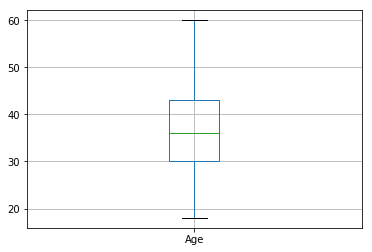

In [63]:
data.boxplot('Age')
#no outliers

/Users/gp/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


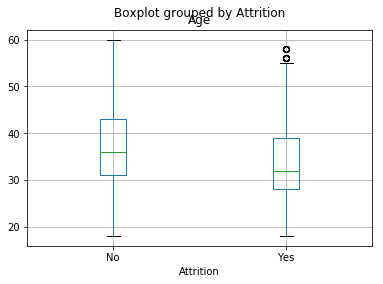

In [64]:
data.boxplot('Age', by = 'Attrition')

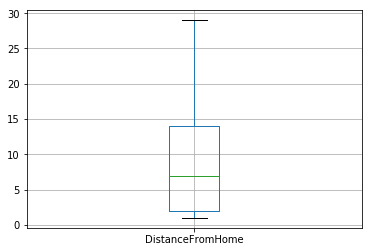

In [65]:
data.boxplot('DistanceFromHome')
#no outliers

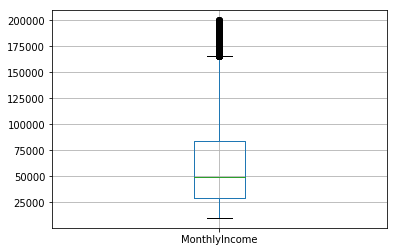

In [66]:
data.boxplot('MonthlyIncome')
#replace outlier values with upper whisker value

[10090.0, 165550.0]

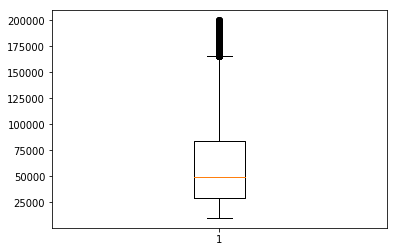

In [67]:
B=plt.boxplot(data['MonthlyIncome'])
[item.get_ydata()[1] for item in B['whiskers']]

In [68]:
data['MonthlyIncome'].describe()

count      4300.000000
mean      65059.844186
std       47045.398914
min       10090.000000
25%       29260.000000
50%       49360.000000
75%       83802.500000
max      199990.000000
Name: MonthlyIncome, dtype: float64

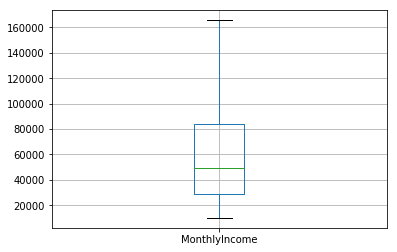

In [69]:
data.loc[data['MonthlyIncome'] > 165550.0, 'MonthlyIncome'] = 165550
data.boxplot('MonthlyIncome')

In [70]:
np.percentile(data['MonthlyIncome'],75) + 1.5 * (np.percentile(data['MonthlyIncome'],75) - np.percentile(data['MonthlyIncome'],25))

165616.25

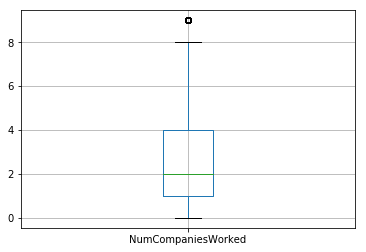

In [71]:
data.boxplot('NumCompaniesWorked')
#just 1 outlier, safe to ignore

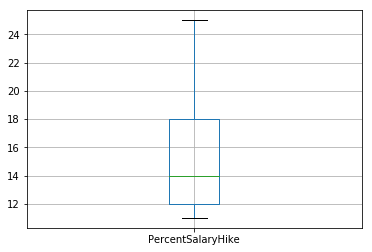

In [72]:
data.boxplot('PercentSalaryHike')
#no outliers

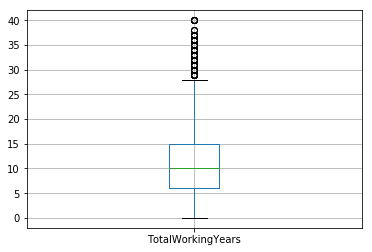

In [73]:
data.boxplot('TotalWorkingYears')
#Taking 29 as upper cap

In [74]:
data['TotalWorkingYears'].describe()

count    4300.000000
mean       11.285116
std         7.790052
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [75]:
data.loc[data['TotalWorkingYears'] > 29 , 'TotalWorkingYears'] = 29

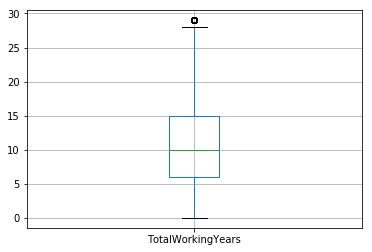

In [76]:
data.boxplot('TotalWorkingYears')

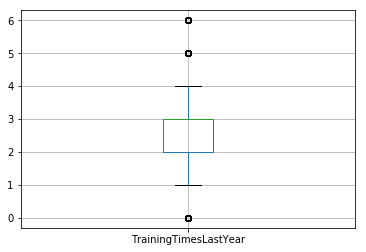

In [77]:
data.boxplot('TrainingTimesLastYear')

In [78]:
data[data['TrainingTimesLastYear'] > 4]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,total,time_slab
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1,0,0,3.0,4.0,2.0,3,3,1710,2
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,8,7,5,4.0,4.0,3.0,2,3,1690,2
6,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,Female,4,...,7,7,7,3.0,2.0,2.0,3,3,2558,3
19,35,No,Travel_Rarely,Sales,7,4,Life Sciences,1,Male,1,...,7,6,2,2.0,2.0,2.0,2,3,1614,2
20,38,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,Female,1,...,8,7,7,1.0,1.0,3.0,3,3,2146,2
31,26,Yes,Travel_Rarely,Research & Development,4,3,Medical,1,Male,3,...,3,0,2,1.0,2.0,3.0,2,3,2406,3
32,28,No,Travel_Rarely,Research & Development,7,3,Other,1,Male,1,...,5,0,2,4.0,4.0,3.0,2,3,1623,2
36,26,Yes,Travel_Rarely,Research & Development,8,3,Medical,1,Male,2,...,8,7,4,4.0,4.0,3.0,3,3,2383,3
43,41,No,Travel_Rarely,Research & Development,29,1,Life Sciences,1,Male,1,...,22,0,4,4.0,2.0,3.0,3,3,1682,2


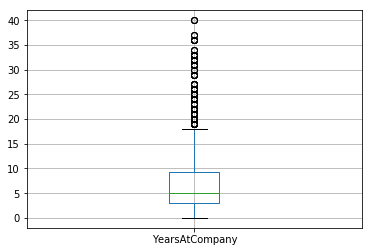

In [79]:
data.boxplot('YearsAtCompany')
#Taking 20 as upper cap

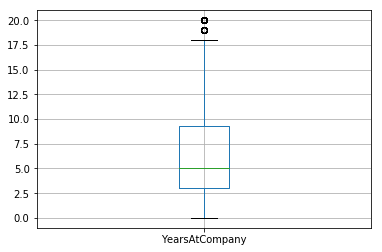

In [80]:
data.loc[data['YearsAtCompany'] > 20 , 'YearsAtCompany'] = 20
data.boxplot('YearsAtCompany')

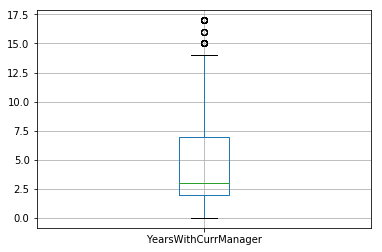

In [81]:
data.boxplot('YearsWithCurrManager')

In [82]:
data[data['YearsWithCurrManager'] > 15]
#ignoring outliers

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,total,time_slab
EmployeeID,,,,,,,,,,,,,,,,,,,,,
129,37,No,Travel_Rarely,Research & Development,10,1,Technical Degree,1,Male,1,...,18,12,17,4.0,1.0,2.0,3,3,1548,2
304,52,No,Travel_Rarely,Sales,21,5,Technical Degree,1,Male,3,...,20,1,16,3.0,1.0,4.0,3,3,1378,1
359,51,No,Travel_Rarely,Sales,16,3,Medical,1,Male,3,...,20,4,17,1.0,3.0,2.0,3,3,1412,1
429,41,No,Travel_Rarely,Research & Development,1,4,Medical,1,Male,1,...,18,2,17,4.0,1.0,3.0,3,3,2496,3
618,44,No,Travel_Rarely,Research & Development,3,4,Medical,1,Male,2,...,20,13,17,4.0,4.0,3.0,1,3,1799,2
669,43,No,Travel_Rarely,Research & Development,7,2,Medical,1,Female,1,...,20,15,17,4.0,4.0,4.0,4,3,1481,1
821,44,No,Travel_Rarely,Sales,26,1,Marketing,1,Male,1,...,20,14,17,4.0,1.0,4.0,2,3,1804,2
1091,40,No,Travel_Rarely,Research & Development,3,3,Other,1,Male,1,...,19,11,16,1.0,1.0,3.0,3,3,1653,2
1241,44,No,Travel_Rarely,Research & Development,3,1,Life Sciences,1,Female,1,...,20,5,17,1.0,4.0,3.0,3,3,1711,2


In [83]:
## Removing redundant columns
data.drop (['Over18', 'EmployeeCount', 'StandardHours'], axis = 'columns', inplace = True)
data.shape

(4300, 27)

In [84]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'total',
       'time_slab'],
      dtype='object')

In [85]:
data['PercentSalaryHike'] = data['PercentSalaryHike'].astype('int')

In [86]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
total                       object
time_slab                   object
dtype: object

In [87]:
cat_var = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'StockOptionLevel', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'time_slab']

In [88]:
num_var = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [89]:
len(cat_var)

15

In [90]:
len(num_var)

10

In [91]:
for col in cat_var:
    data[col] = data[col].astype('category')

In [92]:
data.dtypes

Age                           int64
Attrition                    object
BusinessTravel             category
Department                 category
DistanceFromHome              int64
Education                  category
EducationField             category
Gender                     category
JobLevel                   category
JobRole                    category
MaritalStatus              category
MonthlyIncome                 int64
NumCompaniesWorked          float64
PercentSalaryHike             int64
StockOptionLevel           category
TotalWorkingYears           float64
TrainingTimesLastYear         int64
YearsAtCompany                int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
EnvironmentSatisfaction    category
JobSatisfaction            category
WorkLifeBalance            category
JobInvolvement             category
PerformanceRating          category
total                        object
time_slab                  category
dtype: object

In [93]:
data['BusinessTravel'].describe()

count              4300
unique                3
top       Travel_Rarely
freq               3051
Name: BusinessTravel, dtype: object

In [94]:
X = data.iloc[:, ]

In [ ]:
"""from sklearn.preprocessing import LabelEncoder, OneHotEncoder
for col in cat_var:
    labelencoder_data = LabelEncoder()
    data[col] = labelencoder_data.fit_transform(data[col])"""

In [95]:
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,total,time_slab
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1,0,0,3.0,4.0,2.0,3,3,1710,2
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,5,1,4,3.0,2.0,4.0,2,4,1821,2
3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5,0,3,2.0,2.0,1.0,3,3,1697,2
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,8,7,5,4.0,4.0,3.0,2,3,1690,2
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,6,0,4,4.0,1.0,3.0,3,3,1961,2
6,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,Female,4,Research Director,...,7,7,7,3.0,2.0,2.0,3,3,2558,3
7,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,Male,2,Sales Executive,...,0,0,0,1.0,3.0,1.0,3,4,1606,2
8,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,Male,2,Sales Executive,...,0,0,0,1.0,2.0,3.0,3,4,1634,2
9,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,Male,3,Laboratory Technician,...,9,7,8,2.0,4.0,3.0,3,4,1664,2


In [96]:
data.dtypes

Age                           int64
Attrition                    object
BusinessTravel             category
Department                 category
DistanceFromHome              int64
Education                  category
EducationField             category
Gender                     category
JobLevel                   category
JobRole                    category
MaritalStatus              category
MonthlyIncome                 int64
NumCompaniesWorked          float64
PercentSalaryHike             int64
StockOptionLevel           category
TotalWorkingYears           float64
TrainingTimesLastYear         int64
YearsAtCompany                int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
EnvironmentSatisfaction    category
JobSatisfaction            category
WorkLifeBalance            category
JobInvolvement             category
PerformanceRating          category
total                        object
time_slab                  category
dtype: object

In [97]:
dummy_var = pd.get_dummies(data[cat_var])

In [98]:
dummy_var.shape

(4300, 61)

In [99]:
dummy_var

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,...,WorkLifeBalance_4.0,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,PerformanceRating_3,PerformanceRating_4,time_slab_1,time_slab_2,time_slab_3
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
2,0,1,0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
3,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
6,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
7,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
8,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
9,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [100]:
dummy_var.columns

Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'Education_5',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobLevel_1', 'JobLevel_2',
       'JobLevel_3', 'JobLevel_4', 'JobLevel_5',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'StockOption

In [101]:
dummy_var.drop(['BusinessTravel_Travel_Rarely', 'Department_Sales','Education_5','EducationField_Technical Degree', 
                'Gender_Male', 'JobLevel_5', 'JobRole_Sales Representative','MaritalStatus_Single', 'StockOptionLevel_3', 
                'EnvironmentSatisfaction_4.0', 'JobSatisfaction_4.0','WorkLifeBalance_4.0', 'JobInvolvement_4',
                'PerformanceRating_4','time_slab_3'], axis = 'columns', inplace = True)

In [102]:
dummy_var.shape

(4300, 46)

In [103]:
dummy_var.columns

Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'Department_Human Resources', 'Department_Research & Development',
       'Education_1', 'Education_2', 'Education_3', 'Education_4',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'Gender_Female', 'JobLevel_1', 'JobLevel_2',
       'JobLevel_3', 'JobLevel_4', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'StockOptionLevel_0', 'StockOptionLevel_1',
       'StockOptionLevel_2', 'EnvironmentSatisfaction_1.0',
       'EnvironmentSatisfaction_2.0', 'EnvironmentSatisfaction_3.0',
       'JobSatisfaction_1.0', 'JobSatisfaction_

In [104]:
data_num = data[num_var]

In [105]:
data_num

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,
1,51,6,131160,1.0,11,1.0,6,1,0,0
2,31,10,41890,0.0,23,6.0,3,5,1,4
3,32,17,165550,1.0,15,5.0,2,5,0,3
4,38,2,83210,3.0,11,13.0,5,8,7,5
5,32,10,23420,4.0,12,9.0,2,6,0,4
6,46,8,40710,3.0,13,28.0,5,7,7,7
7,28,11,58130,2.0,20,5.0,2,0,0,0
8,29,18,31430,2.0,22,10.0,2,0,0,0
9,31,1,20440,0.0,21,10.0,2,9,7,8


In [106]:
data_final = data_num.join(dummy_var)
data_final

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,...,JobSatisfaction_3.0,WorkLifeBalance_1.0,WorkLifeBalance_2.0,WorkLifeBalance_3.0,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,PerformanceRating_3,time_slab_1,time_slab_2
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,6,131160,1.0,11,1.0,6,1,0,0,...,0,0,1,0,0,0,1,1,0,1
2,31,10,41890,0.0,23,6.0,3,5,1,4,...,0,0,0,0,0,1,0,0,0,1
3,32,17,165550,1.0,15,5.0,2,5,0,3,...,0,1,0,0,0,0,1,1,0,1
4,38,2,83210,3.0,11,13.0,5,8,7,5,...,0,0,0,1,0,1,0,1,0,1
5,32,10,23420,4.0,12,9.0,2,6,0,4,...,0,0,0,1,0,0,1,1,0,1
6,46,8,40710,3.0,13,28.0,5,7,7,7,...,0,0,1,0,0,0,1,1,0,0
7,28,11,58130,2.0,20,5.0,2,0,0,0,...,1,1,0,0,0,0,1,0,0,1
8,29,18,31430,2.0,22,10.0,2,0,0,0,...,0,0,0,1,0,0,1,0,0,1
9,31,1,20440,0.0,21,10.0,2,9,7,8,...,0,0,0,1,0,0,1,0,0,1


In [107]:
data_final.columns

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'Department_Human Resources', 'Department_Research & Development',
       'Education_1', 'Education_2', 'Education_3', 'Education_4',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'Gender_Female', 'JobLevel_1', 'JobLevel_2',
       'JobLevel_3', 'JobLevel_4', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'MaritalStatus_Divorced',
       'MaritalStatus_Married

In [149]:
X = data_final.iloc[:, :].values
y = data.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [150]:
print (X.shape)
print (y.shape)

(4300, 56)
(4300,)


In [151]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [204]:
data_final

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,...,JobSatisfaction_3.0,WorkLifeBalance_1.0,WorkLifeBalance_2.0,WorkLifeBalance_3.0,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,PerformanceRating_3,time_slab_1,time_slab_2
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,6,131160,1.0,11,1.0,6,1,0,0,...,0,0,1,0,0,0,1,1,0,1
2,31,10,41890,0.0,23,6.0,3,5,1,4,...,0,0,0,0,0,1,0,0,0,1
3,32,17,165550,1.0,15,5.0,2,5,0,3,...,0,1,0,0,0,0,1,1,0,1
4,38,2,83210,3.0,11,13.0,5,8,7,5,...,0,0,0,1,0,1,0,1,0,1
5,32,10,23420,4.0,12,9.0,2,6,0,4,...,0,0,0,1,0,0,1,1,0,1
6,46,8,40710,3.0,13,28.0,5,7,7,7,...,0,0,1,0,0,0,1,1,0,0
7,28,11,58130,2.0,20,5.0,2,0,0,0,...,1,1,0,0,0,0,1,0,0,1
8,29,18,31430,2.0,22,10.0,2,0,0,0,...,0,0,0,1,0,0,1,0,0,1
9,31,1,20440,0.0,21,10.0,2,9,7,8,...,0,0,0,1,0,0,1,0,0,1


## model without feature scaling

In [206]:
X = data_final.iloc[:, :].values
y = data.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Logistic Regression to the Training set
lr0 = LogisticRegression(random_state = 0)
lr0.fit(X_train, y_train)

# Predicting the Test set results
y_pred0 = lr0.predict(X_test)

# Making the Confusion Matrix
cm0 = confusion_matrix(y_test, y_pred0)
print (cm0)

print (classification_report(y_test, y_pred0))
metrics.accuracy_score(y_test, y_pred0)

[[718   0]
 [142   0]]
             precision    recall  f1-score   support

         No       0.83      1.00      0.91       718
        Yes       0.00      0.00      0.00       142

avg / total       0.70      0.83      0.76       860



/Users/gp/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.83488372093023255

Model classified all test points as 'No' thus we need to scale the numeric features

## Feature scaling

In [152]:
X_train[:,0]

array([ 36.,  40.,  41., ...,  48.,  41.,  49.])

In [153]:
X_train[0]

array([  3.60000000e+01,   2.00000000e+00,   1.14160000e+05,
         6.00000000e+00,   1.60000000e+01,   1.30000000e+01,
         2.00000000e+00,   5.00000000e+00,   0.00000000e+00,
         4.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [154]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train[:,:10] = sc_X.fit_transform(X_train[:,:10])
X_test[:,:10] = sc_X.transform(X_test[:,:10])

In [155]:
X_train[:,0]

array([-0.09755842,  0.33927979,  0.44848935, ...,  1.21295621,
        0.44848935,  1.32216577])

In [156]:
X_train[0]

array([-0.09755842, -0.8823026 ,  1.16606282,  1.29845276,  0.22167556,
        0.25646468, -0.62445228, -0.33412696, -0.68104223, -0.04415552,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  1.        ,  0.        ,  1.        ])

# model1

Used all 56 variables created after data exploration

In [157]:
# Fitting Logistic Regression to the Training set
lr1 = LogisticRegression(random_state = 0)
lr1.fit(X_train, y_train)

# Predicting the Test set results
y_pred1 = lr1.predict(X_test)

# Making the Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred1)
print (cm1)

print (classification_report(y_test, y_pred1))

[[696  22]
 [109  33]]
             precision    recall  f1-score   support

         No       0.86      0.97      0.91       718
        Yes       0.60      0.23      0.34       142

avg / total       0.82      0.85      0.82       860



In [158]:
metrics.accuracy_score(y_test, y_pred1)

0.8476744186046512

In [169]:
y_pred1_prob = lr1.predict_proba(X_test)

/Users/gp/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


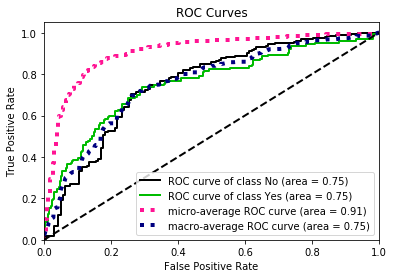

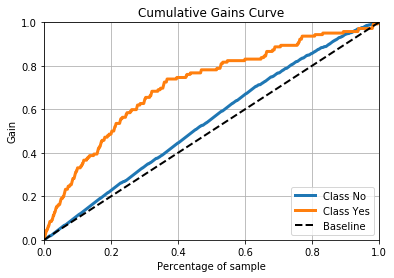

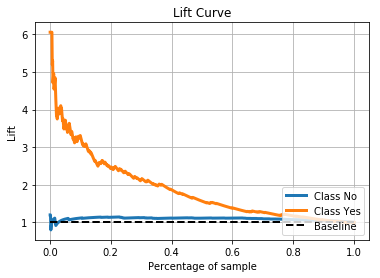

In [170]:
prc(y_test, y_pred1_prob)
pcg(y_test, y_pred1_prob)
plc(y_test, y_pred1_prob)

In [161]:
y_test.shape

(860,)

In [162]:
y_pred1.shape

(860,)

In [164]:
type(y_pred1)

numpy.ndarray

In [118]:
lr1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [119]:
lr1.decision_function(X_test)

array([ -2.02070613e+00,  -4.81172004e-01,   2.97617644e-01,
        -3.51854846e+00,  -1.15441424e+00,  -2.63636843e+00,
        -2.43129743e+00,  -4.59243601e+00,   1.22834001e+00,
        -4.67204770e+00,  -2.79222524e+00,  -1.71921278e+00,
         5.97848308e-02,  -2.14425048e+00,  -2.12750752e+00,
        -3.76800531e+00,  -4.73247469e+00,  -1.93375315e+00,
        -2.88152065e+00,  -3.54367811e+00,  -5.92720423e+00,
        -4.56640455e+00,  -3.03837502e+00,  -1.58630950e+00,
        -2.56592479e+00,  -2.21893480e+00,  -1.48895493e+00,
        -3.86625508e+00,  -3.42697785e+00,  -3.32244114e+00,
        -1.28179078e+00,  -4.42984388e+00,  -8.62470794e-01,
        -3.28074027e+00,  -2.78396196e+00,  -6.32232586e+00,
        -4.57485001e-01,  -1.51073633e+00,  -1.73282500e+00,
        -3.12690740e+00,  -1.74908279e+00,  -5.87884080e+00,
        -1.35821676e+00,  -3.47787208e+00,  -2.97981441e+00,
        -3.46292837e-01,  -3.53219397e+00,  -3.48822194e+00,
        -2.98009335e+00,

In [ ]:
"""# Create, fit model
mod1 = sm.Logit(endog=y_train, exog=X_train)
res = mod1.fit(method='bfgs', maxiter=100)

# Output model summary
print (res.summary())

# Create, output AUC
predicted = res.predict(X_test)
auc = roc_auc_score(y_true=y_test, y_score=predicted)
print ('AUC for 20%% holdout: %s' %auc)"""

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [180]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_final.values, i) for i in range(data_final.shape[1])]
vif["features"] = data_final.columns

In [181]:
vif

,VIF Factor,features
0,33.306485,Age
1,2.347223,DistanceFromHome
2,3.263271,MonthlyIncome
3,2.756942,NumCompaniesWorked
4,29.863134,PercentSalaryHike
5,10.091682,TotalWorkingYears
6,5.837476,TrainingTimesLastYear
7,12.734468,YearsAtCompany
8,2.485471,YearsSinceLastPromotion
9,7.429021,YearsWithCurrManager


In [174]:
data_const = add_constant(data_final)
vif_const = pd.DataFrame()
vif_const["VIF Factor"] = [variance_inflation_factor(data_const.values, i) for i in range(data_const.shape[1])]
vif_const["features"] = data_const.columns

In [176]:
vif_const # after adding constant column

,VIF Factor,features
0,260.443877,const
1,2.069803,Age
2,1.031491,DistanceFromHome
3,1.049878,MonthlyIncome
4,1.275624,NumCompaniesWorked
5,2.590467,PercentSalaryHike
6,3.112478,TotalWorkingYears
7,1.045165,TrainingTimesLastYear
8,4.861185,YearsAtCompany
9,1.703195,YearsSinceLastPromotion


# model 2

removing age factor because it has highest vif

In [184]:
# Fitting Logistic Regression to the Training set
lr2 = LogisticRegression(random_state = 0)
lr2.fit(X_train[:,1:], y_train)

# Predicting the Test set results
y_pred2 = lr2.predict(X_test[:,1:])

# Making the Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred2)
print (cm2)

print (classification_report(y_test, y_pred2))

[[697  21]
 [114  28]]
             precision    recall  f1-score   support

         No       0.86      0.97      0.91       718
        Yes       0.57      0.20      0.29       142

avg / total       0.81      0.84      0.81       860



In [185]:
metrics.accuracy_score(y_test, y_pred2)

0.84302325581395354

In [186]:
y_pred1_prob = lr1.predict_proba(X_test)

/Users/gp/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


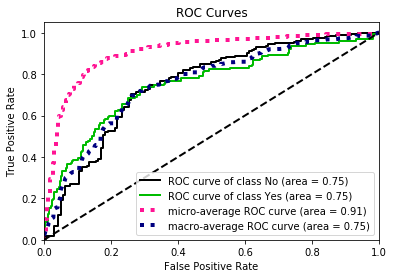

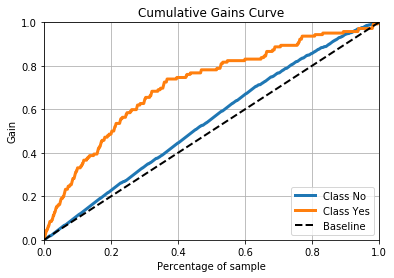

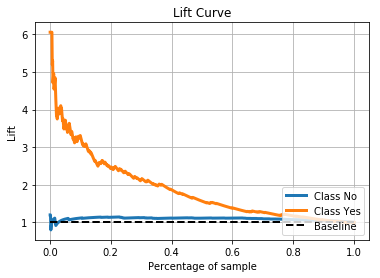

In [187]:
prc(y_test, y_pred1_prob)
pcg(y_test, y_pred1_prob)
plc(y_test, y_pred1_prob)

All metrics values have decreased. Thus model 1 is better.

# Feature selection

## Recursive feature elimination

Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

## Feature ranking with recursive feature elimination and cross-validation

RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

In [215]:
cols = data_final.columns
X_rfe = data_final[cols]
y_rfe = data['Attrition']

## scoring  = accuracy

Optimal number of features: 50
Selected features: ['Age', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'Department_Human Resources', 'Department_Research & Development', 'Education_1', 'Education_2', 'Education_3', 'Education_4', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Medical', 'EducationField_Other', 'Gender_Female', 'JobLevel_1', 'JobLevel_2', 'JobLevel_3', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'StockOptionLevel_0', 'StockOptionLevel_2', 'EnvironmentSatisfaction_1.0', 'EnvironmentSatisfaction_2.0', 'EnvironmentSatisfaction_3.0', 'JobSatisfa

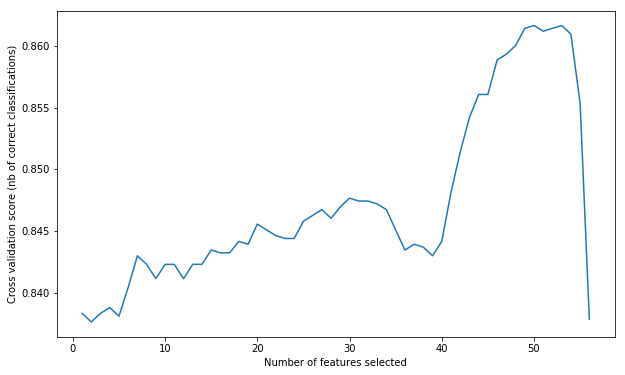

In [216]:
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X_rfe, y_rfe)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_rfe.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [213]:
# Build a logreg and compute the feature importances
model_rfe50 = LogisticRegression()
# create the RFE model and select 50 attributes
rfe50 = RFE(model_rfe50, 50)
rfe50 = rfe50.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X_rfe.columns[rfe50.support_]))

Selected features: ['Age', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'Department_Human Resources', 'Department_Research & Development', 'Education_1', 'Education_2', 'Education_3', 'Education_4', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'Gender_Female', 'JobLevel_1', 'JobLevel_2', 'JobLevel_3', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'StockOptionLevel_0', 'StockOptionLevel_2', 'EnvironmentSatisfaction_1.0', 'EnvironmentSatisfaction_2.0', 'EnvironmentSatisfaction_3.0', 'JobSatisfacti

In [218]:
cols50 = X_rfe.columns[rfe50.support_]

In [267]:
data_final[cols50].corr()

,Age,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Human Resources,...,JobSatisfaction_2.0,JobSatisfaction_3.0,WorkLifeBalance_1.0,WorkLifeBalance_2.0,WorkLifeBalance_3.0,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,time_slab_1,time_slab_2
Age,1.000000,0.303709,-0.034313,0.679726,-0.032032,0.216554,0.204117,-0.014336,-0.023939,-0.005802,...,0.003044,0.008182,0.010968,0.019492,-0.013248,0.000398,-0.008172,-0.016794,0.019457,-0.029648
NumCompaniesWorked,0.303709,1.000000,0.030201,0.247446,-0.030093,-0.033514,-0.107591,0.001353,-0.038679,-0.054669,...,0.029642,-0.003908,0.040983,-0.004063,-0.037433,-0.005790,-0.009335,-0.013669,0.007438,0.000119
PercentSalaryHike,-0.034313,0.030201,1.000000,-0.025032,-0.035020,-0.028367,-0.039807,0.035889,-0.005923,-0.027216,...,0.008651,-0.017999,0.023218,0.034698,-0.034281,-0.013466,0.019971,-0.011375,-0.043915,0.042239
TotalWorkingYears,0.679726,0.247446,-0.025032,1.000000,-0.041377,0.407620,0.469682,-0.030815,-0.008896,-0.033846,...,-0.001031,-0.010513,-0.018083,0.020438,-0.012647,-0.005906,0.018735,-0.024922,0.036253,-0.031667
TrainingTimesLastYear,-0.032032,-0.030093,-0.035020,-0.041377,1.000000,0.013697,-0.015719,0.059267,-0.012542,-0.030226,...,-0.043231,0.007474,-0.003896,0.027579,-0.018266,0.009481,0.020184,-0.029160,-0.030797,0.017983
YearsSinceLastPromotion,0.216554,-0.033514,-0.028367,0.407620,0.013697,1.000000,0.510081,0.022660,0.025657,-0.031615,...,0.002677,-0.011490,-0.024920,0.019741,-0.009832,-0.023721,-0.008860,0.008686,0.024871,-0.019377
YearsWithCurrManager,0.204117,-0.107591,-0.039807,0.469682,-0.015719,0.510081,1.000000,0.019514,0.016816,-0.051831,...,-0.006150,-0.018308,-0.010964,-0.001575,0.010436,-0.018985,0.022495,-0.011010,0.037903,-0.001164
BusinessTravel_Non-Travel,-0.014336,0.001353,0.035889,-0.030815,0.059267,0.022660,0.019514,1.000000,-0.162529,-0.037842,...,0.001533,0.045796,-0.000501,0.011174,-0.020370,-0.015547,0.042214,-0.033374,0.040465,-0.011420
BusinessTravel_Travel_Frequently,-0.023939,-0.038679,-0.005923,-0.008896,-0.012542,0.025657,0.016816,-0.162529,1.000000,-0.035083,...,-0.017907,0.004112,-0.016724,0.006918,-0.003479,-0.018993,-0.030929,0.050885,-0.064099,0.055129
Department_Human Resources,-0.005802,-0.054669,-0.027216,-0.033846,-0.030226,-0.031615,-0.051831,-0.037842,-0.035083,1.000000,...,0.006975,-0.030044,-0.006065,0.020335,-0.011361,0.022740,-0.022910,0.003129,0.010371,-0.015624


In [220]:
# Splitting the dataset into the Training set and Test set
X_train50, X_test50, y_train50, y_test50 = train_test_split(X_rfe[cols50], y_rfe, test_size = 0.2, random_state = 0)

[[699  19]
 [112  30]]
             precision    recall  f1-score   support

         No       0.86      0.97      0.91       718
        Yes       0.61      0.21      0.31       142

avg / total       0.82      0.85      0.82       860

0.847674418605


/Users/gp/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


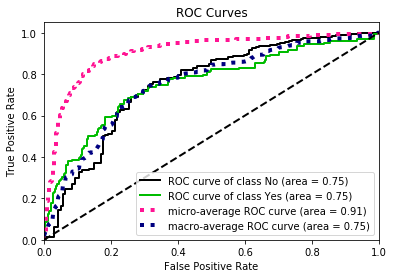

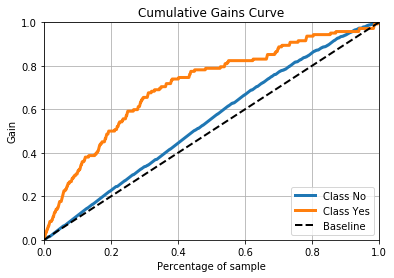

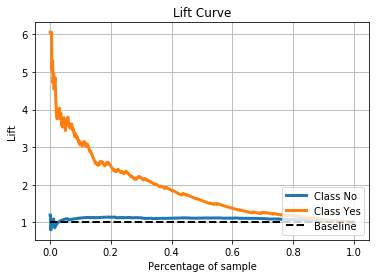

In [223]:
# Fitting Logistic Regression to the Training set
lr50 = LogisticRegression(random_state = 0)
lr50.fit(X_train50, y_train50)

# Predicting the Test set results
y_pred50 = lr50.predict(X_test50)

# Making the Confusion Matrix
cm50 = confusion_matrix(y_test50, y_pred50)
print (cm50)

print (classification_report(y_test50, y_pred50))

print (metrics.accuracy_score(y_test50, y_pred50))

y_pred50_prob = lr50.predict_proba(X_test50)

prc(y_test50, y_pred50_prob)
pcg(y_test50, y_pred50_prob)
plc(y_test50, y_pred50_prob)

## scoring = none

Optimal number of features: 53
Selected features: ['Age', 'DistanceFromHome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'Department_Human Resources', 'Department_Research & Development', 'Education_1', 'Education_2', 'Education_3', 'Education_4', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'Gender_Female', 'JobLevel_1', 'JobLevel_2', 'JobLevel_3', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'StockOptionLevel_0', 'StockOptionLevel_1', 'StockOptionLevel_2', 'EnvironmentSati

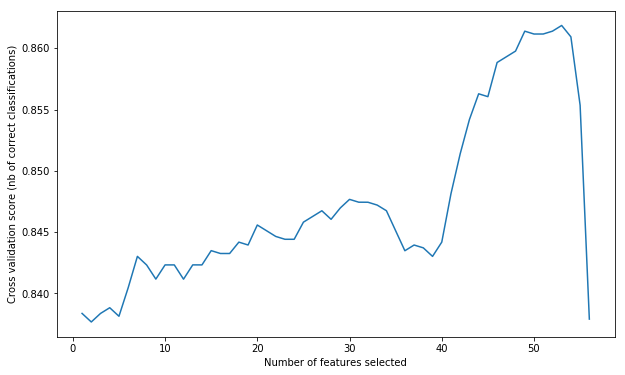

In [224]:
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10)
rfecv.fit(X_rfe, y_rfe)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_rfe.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

[[697  21]
 [110  32]]
             precision    recall  f1-score   support

         No       0.86      0.97      0.91       718
        Yes       0.60      0.23      0.33       142

avg / total       0.82      0.85      0.82       860

0.847674418605


/Users/gp/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


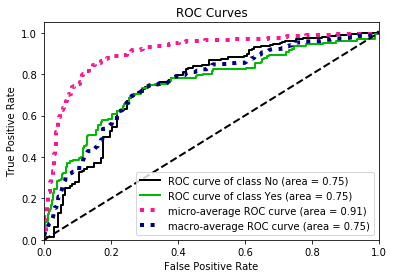

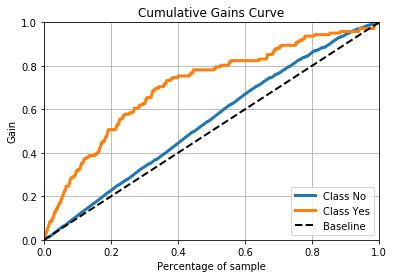

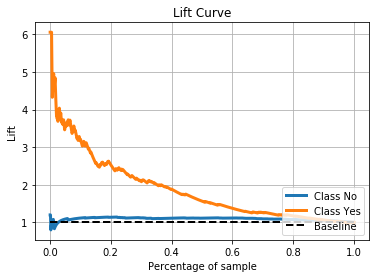

In [228]:
cols53 = ['Age', 'DistanceFromHome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'Department_Human Resources', 'Department_Research & Development', 'Education_1', 'Education_2', 'Education_3', 'Education_4', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'Gender_Female', 'JobLevel_1', 'JobLevel_2', 'JobLevel_3', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'StockOptionLevel_0', 'StockOptionLevel_1', 'StockOptionLevel_2', 'EnvironmentSatisfaction_1.0', 'EnvironmentSatisfaction_2.0', 'EnvironmentSatisfaction_3.0', 'JobSatisfaction_1.0', 'JobSatisfaction_2.0', 'JobSatisfaction_3.0', 'WorkLifeBalance_1.0', 'WorkLifeBalance_2.0', 'WorkLifeBalance_3.0', 'JobInvolvement_1', 'JobInvolvement_2', 'JobInvolvement_3', 'time_slab_1', 'time_slab_2']

# Splitting the dataset into the Training set and Test set
X_train53, X_test53, y_train53, y_test53 = train_test_split(X_rfe[cols53], y_rfe, test_size = 0.2, random_state = 0)

# Fitting Logistic Regression to the Training set
lr53 = LogisticRegression(random_state = 0)
lr53.fit(X_train53, y_train53)

# Predicting the Test set results
y_pred53 = lr53.predict(X_test53)

# Making the Confusion Matrix
cm53 = confusion_matrix(y_test53, y_pred53)
print (cm53)

print (classification_report(y_test53, y_pred53))

print (metrics.accuracy_score(y_test53, y_pred53))

y_pred53_prob = lr53.predict_proba(X_test53)

prc(y_test53, y_pred53_prob)
pcg(y_test53, y_pred53_prob)
plc(y_test53, y_pred53_prob)

## scoring = roc_auc

Optimal number of features: 50
Selected features: ['Age', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'Department_Human Resources', 'Department_Research & Development', 'Education_1', 'Education_2', 'Education_3', 'Education_4', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Medical', 'EducationField_Other', 'Gender_Female', 'JobLevel_1', 'JobLevel_2', 'JobLevel_3', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'StockOptionLevel_0', 'StockOptionLevel_2', 'EnvironmentSatisfaction_1.0', 'EnvironmentSatisfaction_2.0', 'EnvironmentSatisfaction_3.0', 'JobSatisfa

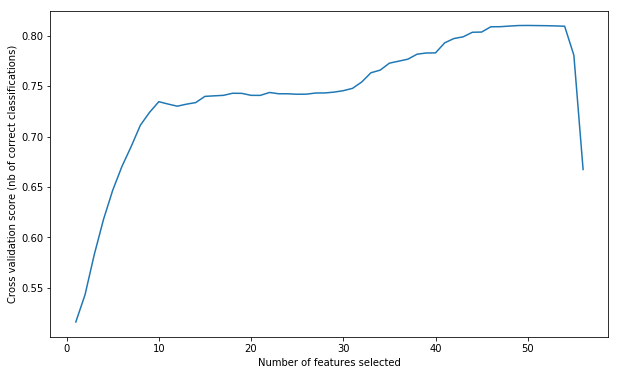

In [235]:
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring = 'roc_auc')
rfecv.fit(X_rfe, y_rfe.map({'Yes': 1, 'No': 0}))

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_rfe.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [238]:
cols_roc = ['Age', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'Department_Human Resources', 'Department_Research & Development', 'Education_1', 'Education_2', 'Education_3', 'Education_4', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Medical', 'EducationField_Other', 'Gender_Female', 'JobLevel_1', 'JobLevel_2', 'JobLevel_3', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'StockOptionLevel_0', 'StockOptionLevel_2', 'EnvironmentSatisfaction_1.0', 'EnvironmentSatisfaction_2.0', 'EnvironmentSatisfaction_3.0', 'JobSatisfaction_1.0', 'JobSatisfaction_2.0', 'JobSatisfaction_3.0', 'WorkLifeBalance_1.0', 'WorkLifeBalance_2.0', 'WorkLifeBalance_3.0', 'JobInvolvement_1', 'JobInvolvement_2', 'JobInvolvement_3', 'PerformanceRating_3', 'time_slab_1', 'time_slab_2']

[[699  19]
 [112  30]]
             precision    recall  f1-score   support

         No       0.86      0.97      0.91       718
        Yes       0.61      0.21      0.31       142

avg / total       0.82      0.85      0.82       860

0.847674418605


/Users/gp/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


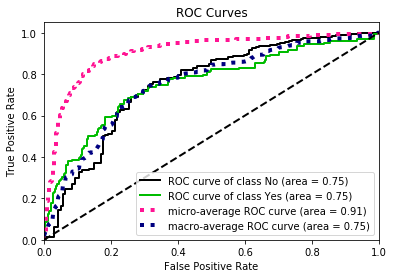

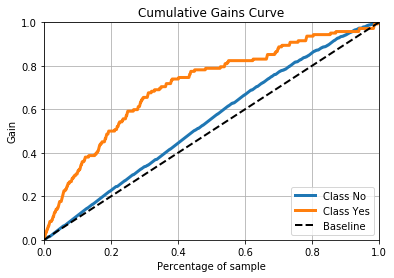

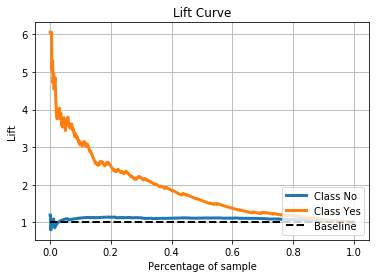

In [239]:
# Splitting the dataset into the Training set and Test set
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_rfe[cols_roc], y_rfe, test_size = 0.2, random_state = 0)

# Fitting Logistic Regression to the Training set
lr50 = LogisticRegression(random_state = 0)
lr50.fit(X_train50, y_train50)

# Predicting the Test set results
y_pred50 = lr50.predict(X_test50)

# Making the Confusion Matrix
cm50 = confusion_matrix(y_test50, y_pred50)
print (cm50)

print (classification_report(y_test50, y_pred50))

print (metrics.accuracy_score(y_test50, y_pred50))

y_pred50_prob = lr50.predict_proba(X_test50)

prc(y_test50, y_pred50_prob)
pcg(y_test50, y_pred50_prob)
plc(y_test50, y_pred50_prob)

## scoring = precision

/Users/gp/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gp/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gp/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gp/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gp/anaconda3/lib/python3.6/site-packages/sklearn/metrics/

Optimal number of features: 6
Selected features: ['EducationField_Human Resources', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'WorkLifeBalance_1.0', 'time_slab_1', 'time_slab_2']


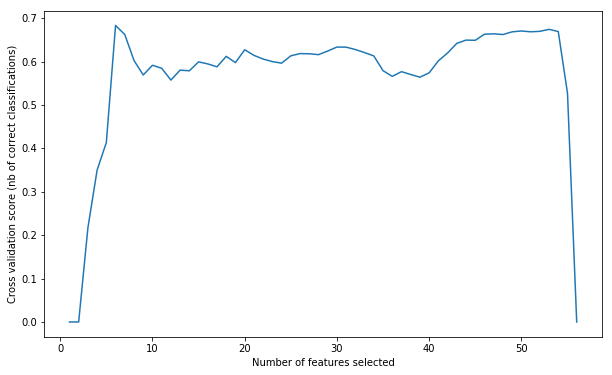

In [236]:
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring = 'precision')
rfecv.fit(X_rfe, y_rfe.map({'Yes': 1, 'No': 0}))

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_rfe.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

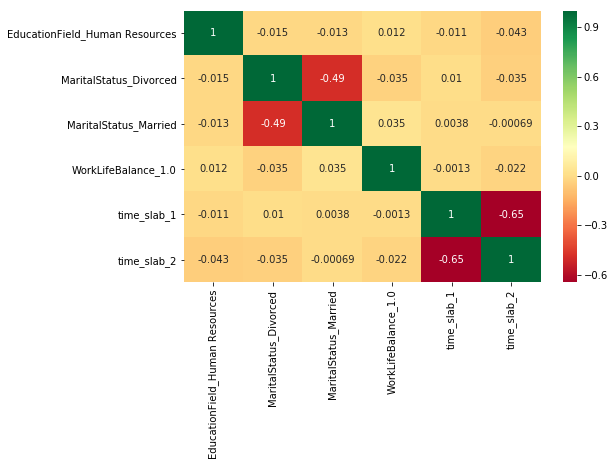

In [266]:
plt.subplots(figsize=(8, 5))
sns.heatmap(data_final[cols6].corr(), annot=True, cmap="RdYlGn")
plt.show()

[[715   3]
 [137   5]]
             precision    recall  f1-score   support

         No       0.84      1.00      0.91       718
        Yes       0.62      0.04      0.07       142

avg / total       0.80      0.84      0.77       860

0.837209302326


/Users/gp/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


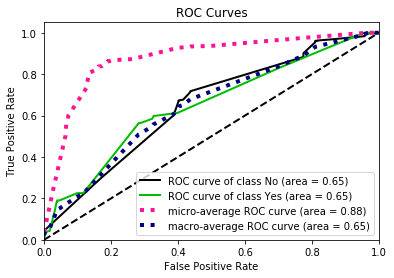

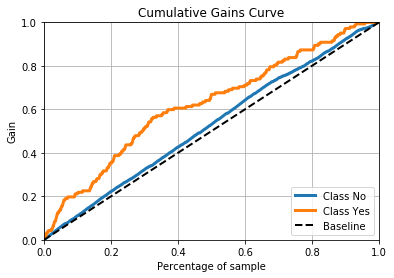

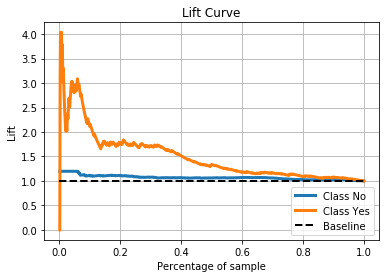

In [237]:
cols6 = ['EducationField_Human Resources', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'WorkLifeBalance_1.0', 'time_slab_1', 'time_slab_2']

# Splitting the dataset into the Training set and Test set
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_rfe[cols6], y_rfe, test_size = 0.2, random_state = 0)

# Fitting Logistic Regression to the Training set
lr6 = LogisticRegression(random_state = 0)
lr6.fit(X_train6, y_train6)

# Predicting the Test set results
y_pred6 = lr6.predict(X_test6)

# Making the Confusion Matrix
cm6 = confusion_matrix(y_test6, y_pred6)
print (cm6)

print (classification_report(y_test6, y_pred6))

print (metrics.accuracy_score(y_test6, y_pred6))

y_pred6_prob = lr6.predict_proba(X_test6)

prc(y_test6, y_pred6_prob)
pcg(y_test6, y_pred6_prob)
plc(y_test6, y_pred6_prob)

## scoring = recall

Optimal number of features: 50
Selected features: ['Age', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'Department_Human Resources', 'Department_Research & Development', 'Education_1', 'Education_2', 'Education_3', 'Education_4', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'Gender_Female', 'JobLevel_1', 'JobLevel_2', 'JobLevel_3', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'StockOptionLevel_0', 'StockOptionLevel_2', 'EnvironmentSatisfaction_1.0', 'EnvironmentSatisfaction_2.0', 'EnvironmentSa

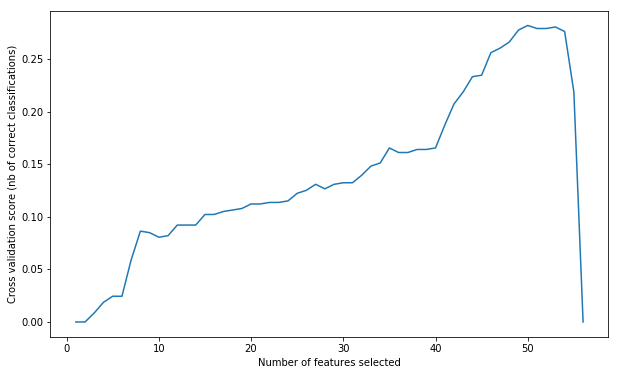

In [240]:
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring = 'recall')
rfecv.fit(X_rfe, y_rfe.map({'Yes': 1, 'No': 0}))

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_rfe.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# variable selection model

In [124]:
lr = LogisticRegression()
def cv_score(variables, X, y):
    cv_scores = cross_val_score(lr, X[variables], y, cv=10, scoring='roc_auc')
    cv_scores = cv_scores.mean()
    return(cv_scores)
    
def sel_var(candidate_variables, X, y):
    best_auc = 0
    best_var = []
    for v in candidate_variables:
        auc_var = cv_score(best_var + [v], X, y)
        if auc_var > best_auc:
            best_auc = auc_var
            best_var = best_var + [v]
    return best_auc, best_var

In [ ]:
"""X = data_final.iloc[:, :].values
y = data.iloc[:, 1].values"""

In [137]:
variables = data_final.columns.values
auc, var = sel_var(variables, X = data_final, y = data['Attrition'].map({'Yes': 1, 'No': 0}) )

In [140]:
len(variables)

56

In [136]:
data['Attrition'].map({'Yes': 1, 'No': 0})

EmployeeID
1       0
2       1
3       0
4       0
5       0
6       0
7       1
8       0
9       0
10      0
11      0
13      0
14      1
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
25      0
26      0
27      0
28      0
29      1
30      0
31      1
32      0
       ..
4379    0
4380    0
4381    0
4382    1
4383    0
4384    0
4385    0
4386    0
4387    1
4388    0
4389    1
4390    0
4391    0
4392    1
4393    0
4394    0
4395    0
4397    0
4398    0
4399    0
4400    0
4401    0
4402    0
4403    1
4404    0
4405    0
4406    0
4407    0
4408    0
4409    0
Name: Attrition, Length: 4300, dtype: int64

In [138]:
print(auc)
print(var)

0.671906499977
['Age', 'MonthlyIncome', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'Department_Research & Development', 'Education_2', 'Education_3', 'Education_4', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'StockOptionLevel_1', 'StockOptionLevel_2', 'EnvironmentSatisfaction_1.0', 'EnvironmentSatisfaction_2.0', 'EnvironmentSatisfaction_3.0', 'JobSatisfaction_1.0', 'JobSatisfaction_2.0', 'JobSatisfaction_3.0', 'WorkLifeBalance_1.0', 'WorkLifeBalance_3.0', 'JobInvolvement_2', 'JobInvolvement_3', 'PerformanceRating_3', 'time_slab_1', 'time_slab_2']


In [139]:
len(var)

33

/Users/gp/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gp/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

         No       0.82      1.00      0.90       707
        Yes       0.00      0.00      0.00       153

avg / total       0.68      0.82      0.74       860



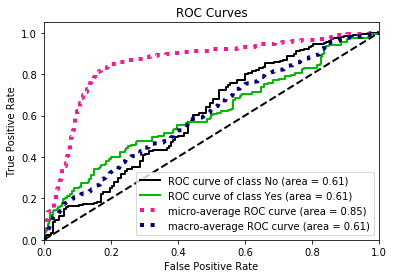

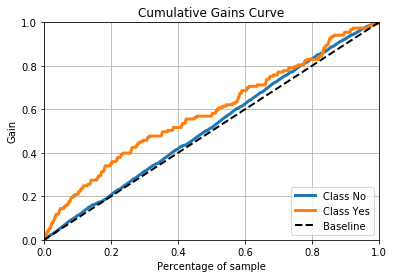

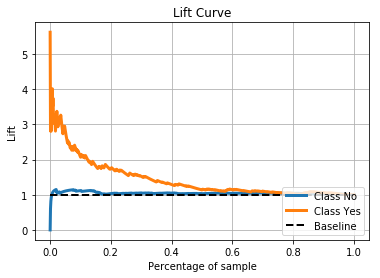

In [146]:
X_train, X_test, y_train, y_test = train_test_split(data_final[var], y, test_size=0.2)
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)
y_pred_bin = lr.predict(X_test)
prc(y_test, y_pred)
pcg(y_test, y_pred)
plc(y_test, y_pred)
print(classification_report(y_test, y_pred_bin))

In [172]:
metrics.accuracy_score(y_test, y_pred_bin)

0.83488372093023255

In [173]:
confusion_matrix(y_test, y_pred_bin)

array([[718,   0],
       [142,   0]])

class imbalance. Precision recall f1-score for 'yes' = 0. Thus model 1 is better.

In [165]:
print(y_pred.shape)
print(type(y_pred))

(860, 2)
<class 'numpy.ndarray'>


In [166]:
y_pred

array([[ 0.81337015,  0.18662985],
       [ 0.84927438,  0.15072562],
       [ 0.73711337,  0.26288663],
       ..., 
       [ 0.78036975,  0.21963025],
       [ 0.81056951,  0.18943049],
       [ 0.86774674,  0.13225326]])